# Case study - Trajectory of a projectile

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import * 
init_printing(use_unicode=True)
import numpy as np 

Objectives
* Study characteristics of the trajectory of a projectile in the ideal case of a motion in a uniform gravitational field
 ![](./trajectory_of_projectile.png)

## 1. Equation of the trajectory

In the ideal case of a motion in a uniform gravitational field, in the absence of other forces (such as air drag), the trajectory of a projectile is described by a parabola given by:

eq(1) :$$ z(x) = -\frac{1}{2}g\frac{x^2}{v^{2}_{0} \cos^2 \alpha} + x\tan \alpha + h $$  

where $g$ is the acceleration of gravity (9.81 $ms^{−2}$ ), $v_{0}$ is the initial velocity of the projectile, $\alpha$ is the angle of elevation and $h$ is the initial altitude from which the projectile is thrown.





* Q1.1 - Create a function that represents equation (1).

In [6]:
from sympy import * 
import numpy as np 
g, x, v0, alpha, h = symbols('g, x, v0, alpha , h', positive=True)

facts = Q.positive(x), Q.positive(v0), Q.positive(alpha), Q.positive(h)

In [7]:
def f(x, alpha, v0, h, g=9.81):      
        return(-g*x**2/(2*(v0**2)*(cos(alpha)*cos(alpha))))+ x*tan(alpha)+h 


* Q 1.2 - Plot the trajectory for the following set of parameters
    * $h = 1.70m$
    * $\alpha = 40^{\circ}$
    * $ v_{0} = 8 ms^{−1}$

In [8]:
fd = f(x,np.deg2rad(40), 8, 1.70)
fd

-0.130602384016567*x**2 + 0.83909963117728*x + 1.7

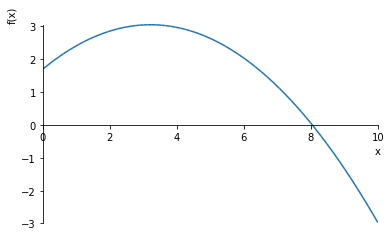

In [9]:
plot(fd, (x, 0, 10))

* Q 1.3 - On the same graph, plot several trajectories of projectile launched at different elevation angles but with the same speed v0 = 8ms−1 and the same initial altitude h = 1.70m.

In [10]:
fr = f(x, alpha, v0 = 8, h=1.7)
fr


-0.076640625*x**2/cos(alpha)**2 + x*tan(alpha) + 1.7

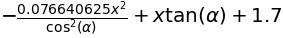

In [10]:
zr= z.subs({g:9.81, h:1.70, v0:8})
zr

In [17]:
r = [10, 20, 30, 40]
r = np.deg2rad(r)
print(r)
l2 = [zr.subs({alpha:a}) for a in r]
l2

[ 0.17453293  0.34906585  0.52359878  0.6981317 ]


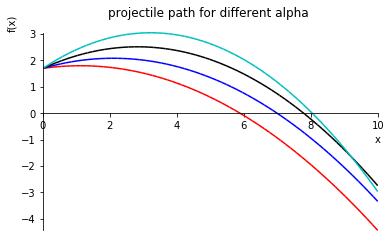

In [18]:
p3 = plot(*l2, (x, 0,  10), show=False, title = 'projectile path for different alpha ')
p3[0].line_color = 'r', 
p3[1].line_color = 'b'
p3[2].line_color = 'k'
p3[3].line_color = 'c'

p3.show()

## 2. Trajectory analysis


* Q 2.1 - Determine a function $f_h(\alpha, v_0 , h)$ that returns the greatest parabolic height a object reaches within its trajectory.



In [11]:
f(x, alpha, v0, h)

h + x*tan(alpha) - 4.905*x**2/(v0**2*cos(alpha)**2)

In [29]:
d_f = diff(f(x, alpha, v0, h), x)
print (d_f)
f_h = solveset(d_f, x, domain=S.Reals)
f_h

tan(alpha) - 9.81*x/(v0**2*cos(alpha)**2)


{0.101936799184506*v0**2*cos(alpha)**2*tan(alpha)}

Q 2.2 - Determine a function $f_R(\alpha, v_0, h)$ that gives the range defined by the greatest distance aobject travels
along the x axis.

In [35]:
s = solve(f(x, alpha, v0, h), x)
f_R =s[1] 
f_R

0.0101936799184506*v0*(10.0*v0*sin(alpha) + sqrt(1962.0*h + 100.0*v0**2*sin(alpha)**2))*cos(alpha)

* Q 2.3 - Illustrate with a graphic that an optimal value of $\alpha$ provides the highest range.



In [41]:
f_R = diff(f_R, alpha)

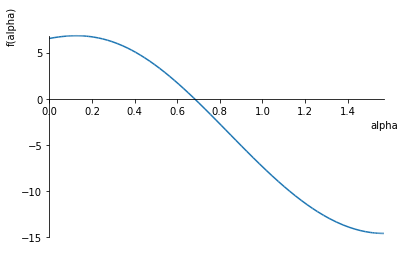

In [42]:
plot(f_R.subs({v0:8, h:1.7}), (alpha, 0, pi/2))

* Q 2.4 - Try to find a symbolic solution of $\alpha$ optimum . Give an numeric solution for the set of parameters defined in section 1.


In [44]:
alpha_optimum = solve(f_R.subs({v0:8, h:1.7}), alpha)
print('alpha in radian ', alpha_optimum[0])
print('alpha in degree' , np.rad2deg(float(alpha_optimum[0])))

alpha in radian  0.681290966881072
alpha in degree 39.0350970227



* Q 2.5 - In the specific case where $h$ = 0, give an algebraic solution of $\alpha$ optimum .

In [45]:
ans = solve(f_R.subs({h:0}), alpha)
ans

[0.785398163397448, 2.35619449019234]

## 3. Starting from scratch


Consider a particle of mass $m$, the Newton second law states:
$$F = ma$$
where $F$ and $a$ represent respectively the sum of forces and the acceleration of the projectile. 
Since we only consider the ideal case with $F = m\overrightarrow{g} = −mg\overrightarrow{z}$. 
Therefore, if we only consider the trajectory of in the plane $O\overrightarrow{x}\overrightarrow{z}$


we can write the coordinate of the mobile $M$ according to $\overrightarrow{OM}= 
\begin{pmatrix} 
  x \\
  z 
\end{pmatrix}$

eq(2):
$$\begin{pmatrix} 
  0 \\
  -g 
\end{pmatrix} = \frac{d^2 \overrightarrow{OM}}{dt^2} = 
\begin{pmatrix} 
  \frac{d^2 x}{dt^2} \\
  \frac{d^2 z}{dt^2}
\end{pmatrix}$$

* Q 3.1 - By integrating equation (2) and using correct initial constant, compute the two equations $x(t)$ and $z(t)$.


In [46]:
t = symbols('t')
x = Function('x')
z = Function('z')
eqx = Eq(x(t).diff(t, 2))
eqz = Eq(z(t).diff(t, 2), -g)

eqx, eqz

(Eq(Derivative(x(t), t, t), 0), Eq(Derivative(z(t), t, t), -g))

In [47]:
e = dsolve(eqz, z(t))
e

Eq(z(t), C1 + C2*t - g*t**2/2)

In [48]:
C1, C2 = symbols('C1, C2')
e.subs({C1:h, C2:v0})

Eq(z(t), -g*t**2/2 + h + t*v0)